# Heart Disease Classification

## The steps:

1. Problem Definition: We are given a set of features about a person and we have to predict whether the person has heart disease or not.
2. Data: We are using the UCI Heart Disease dataset from Cleaveland https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
3. Evaluation: We will pursue the project only if we are able to achieve 95% Accuracy on the target labels.
4. Features:
   Only 14 attributes used:
      * #3  (age)       
      * #4  (sex)       
      * #9  (cp)        
      * #10 (trestbps)  
      * #12 (chol)      
      * #16 (fbs)       
      * #19 (restecg)   
      * #32 (thalach)   
      * #38 (exang)     
      * #40 (oldpeak)   
      * #41 (slope)     
      * #44 (ca)        
      * #51 (thal)      
      * #58 (num)       (the predicted attribute)

In [88]:
#Preparing the tools necessary

#importing the data exploratory libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#importing evaluation methods
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
#from sklearn.metrics import plot_roc_curve

## Getting data ready

Things we have to see and fix in the data:
1. Problem statement
2. DataType of features (Convert text to numerical most of the times)
3. Handle missing values (fillna(), mean)
4. Dealing with outliers
5. Add, Change or Remove features to improve performance

In [89]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
df.shape

(303, 14)

**2. Datatype of features**
Since all our data is already in numeric form we can skip this step

**3. Handling missing values.**

In [91]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Finding Patterns(EDA)

In [92]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Comparing target column to the sex column**

In [93]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [94]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Therefore for females, there is a 75% change of having heart disease and for males it is approx 50%. Hence for the total population it is around 62.5%.

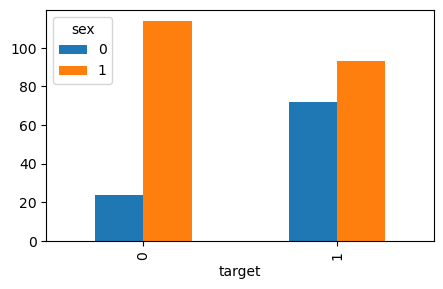

In [95]:
#Plotting a bar graph comparison for sex vs disease
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(5,3));

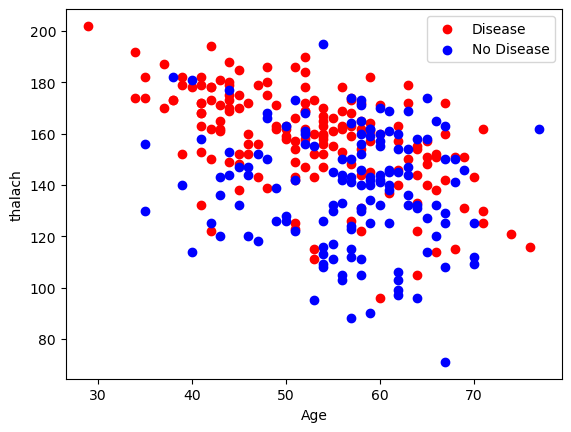

In [96]:
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='blue')
plt.legend(['Disease','No Disease'])
plt.xlabel('Age')
plt.ylabel('thalach');

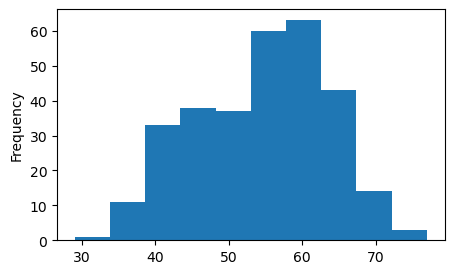

In [97]:
df.age.plot(kind='hist',figsize=(5,3));

### Finding patterns (Correlation matrix) 
* Gives matrix of correlation coefficient between all pairs of columns.
* +ve value indicates increase of one results in increase of other column also
* -ve value indicates increase of one results in decrease of other column.

In [98]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


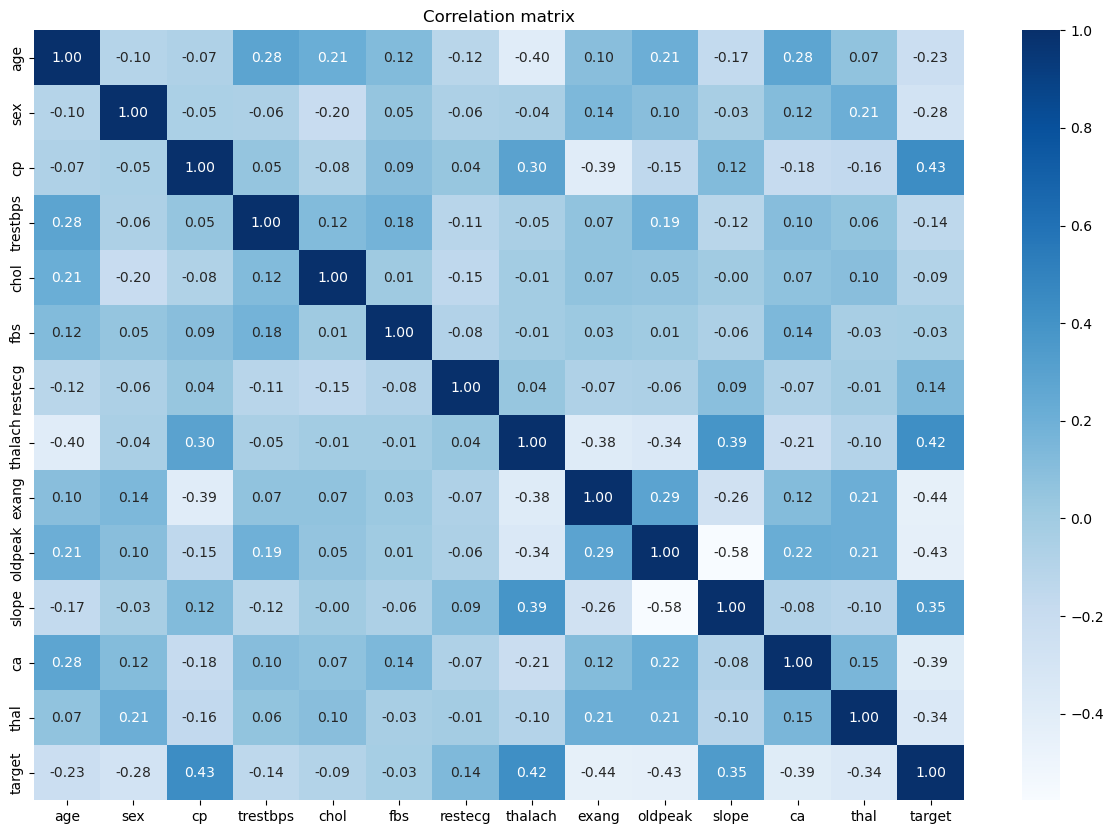

In [99]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True,fmt='.2f')
plt.title('Correlation matrix')
plt.show()

### Splitting the data

In [100]:
x=df.drop('target',axis=1)
y=df['target']

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [102]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
81,45,1,1,128,308,0,0,170,0,0.0,2,0,2
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2


In [103]:
y_train

4      1
99     1
81     1
289    0
108    1
      ..
201    0
95     1
197    0
142    1
3      1
Name: target, Length: 242, dtype: int64

In [104]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2


In [105]:
y_test

196    0
58     1
163    1
193    0
166    0
      ..
17     1
9      1
54     1
132    1
76     1
Name: target, Length: 61, dtype: int64

## Choosing the right model

Now that we have split our data, we are going to build a machine learning model.
We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifiers
3. Random Forest Classifiers

In [106]:
#Creating model dictionary
models={"Logistic Regression" : LogisticRegression(),
        "KNN" : KNeighborsClassifier(),
        "Random Forest" : RandomForestClassifier()}

#Creating a function that automatically fits and scores data on all the 3 models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores


In [107]:
score=fit_and_score(models,x_train,x_test,y_train,y_test)

C:\Users\saksh\OneDrive\Desktop\ML_Course\milestone_project_classification\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [108]:
score

{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.8688524590163934}

<Axes: >

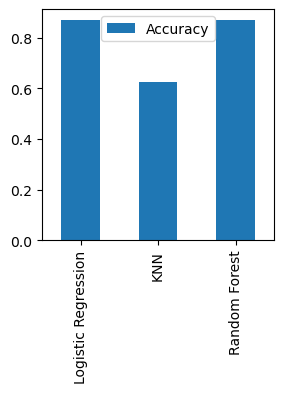

In [109]:
scores_df=pd.DataFrame(data=score,index=['Accuracy']).T
scores_df.plot(kind='bar',figsize=(3,3))

## Tuning/Improving the model

We need to see the following things:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve 

### Hyper parameter tuning manually (KNN)

In [110]:
#lETS TRY TO TUNE KNN MODEL

knn=KNeighborsClassifier()

train_scores=[]
test_scores=[]

neighbours=range(1,21)

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [111]:
train_scores

[1.0,
 0.7892561983471075,
 0.7644628099173554,
 0.7727272727272727,
 0.768595041322314,
 0.7479338842975206,
 0.7355371900826446,
 0.7024793388429752,
 0.7107438016528925,
 0.7148760330578512,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339,
 0.7107438016528925,
 0.6942148760330579,
 0.6818181818181818,
 0.6942148760330579,
 0.6900826446280992,
 0.6983471074380165,
 0.7024793388429752]

In [112]:
test_scores

[0.7049180327868853,
 0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.6557377049180327,
 0.6885245901639344,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836]

The maximum accuracy achieved is : 0.7049180327868853


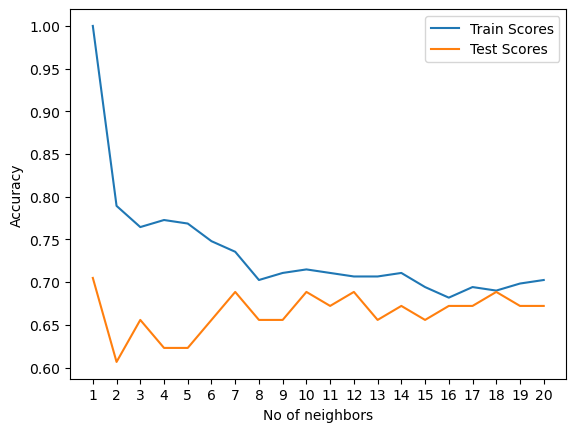

In [113]:
plt.plot(neighbours,train_scores,label="Train Scores")
plt.plot(neighbours,test_scores,label="Test Scores")
plt.xticks(ticks=range(1,21))
plt.xlabel("No of neighbors")
plt.ylabel("Accuracy")
plt.legend()

print(f"The maximum accuracy achieved is : {max(test_scores)}")

### Hyper parameter tuning using RandomSearchCV (Logistic regression and Random Forest Classifier)

* Parameters for Logistic regression- c,solver
* Parameters for Random Forest- n_estimators,max_depth,min_samples_split,min_samples_leaf

In [125]:
lr_grid={"C":np.logspace(-4,4,20),
         "solver":["liblinear"]}

rf_grid={"n_estimators":np.arange(10,1000,20),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [143]:
#Hyperparamter tuning for log reg
lr_model=RandomizedSearchCV(LogisticRegression(),
                            param_distributions=lr_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)
lr_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [144]:
lr_model.score(x_test,y_test)

0.8688524590163934

We see slight improvement in the score for logistic regression model. Doing the same for Random Forest model now

In [127]:
rf_model=RandomizedSearchCV(RandomForestClassifier(),
                            cv=5,
                            n_iter=100,
                            param_distributions=rf_grid,
                            verbose=3)
rf_model.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=750;, score=0.878 total time=   2.2s
[CV 2/5] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=750;, score=0.837 total time=   2.3s
[CV 3/5] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=750;, score=0.771 total time=   2.1s
[CV 4/5] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=750;, score=0.875 total time=   2.1s
[CV 5/5] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=750;, score=0.771 total time=   2.2s
[CV 1/5] END max_depth=5, min_samples_leaf=17, min_samples_split=16, n_estimators=370;, score=0.857 total time=   1.0s
[CV 2/5] END max_depth=5, min_samples_leaf=17, min_samples_split=16, n_estimators=370;, score=0.837 total time=   1.0s
[CV 3/5] END max_depth=5, min_samples_leaf=17, min_samples_split=16, n_estimators=370;, score=0.792

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510,
       530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770,
       790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990])},
                   verbose=3)

In [128]:
rf_model.score(x_test,y_test)

0.8524590163934426

In [129]:
rf_model.best_params_

{'n_estimators': np.int64(670),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(9),
 'max_depth': 5}

In [138]:
model1=RandomForestClassifier(max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=50)
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=13, min_samples_split=18,
                       n_estimators=50)

In [139]:
model1.score(x_test,y_test)

0.8524590163934426

### Hyperparameter tuning using GridSearchCV

In [140]:
#creating grids
lr_grid={"C":np.logspace(-4,4,20),
         "solver":["liblinear"]}
rf_grid={"max_depth":[3],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [141]:
#Uing grid search cv on lr
lr_gs_model=GridSearchCV(LogisticRegression(max_iter=1000),
                         param_grid=lr_grid,
                         cv=5,
                         verbose=True)
lr_gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [142]:
lr_gs_model.score(x_test,y_test)

0.8688524590163934

In [146]:
import pickle
file=open('heart_disease_classification_lr.pkl','wb')
pickle.dump(lr_gs_model,file)
file.close()

### Testing and improving model(useless)

In [56]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [84]:
x=df.drop('target',axis=1)
y=df['target']

In [85]:
# x=x.drop('fbs',axis=1)
# x=x.drop('chol',axis=1)
# x=x.drop('trestbps',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
#Using gridSearchCV on random forest classifier.
rf_gs_model=GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_grid,
                         cv=5,
                         verbose=True)
rf_gs_model.fit(x_train,y_train)

In [62]:
rf_gs_model.score(x_test,y_test)

0.819672131147541

In [67]:
rf_gs_model.best_params_

{'max_depth': 3,
 'min_samples_leaf': np.int64(1),
 'min_samples_split': np.int64(16)}

In [68]:
model=RandomForestClassifier(max_depth=3,min_samples_leaf=1,min_samples_split=16)

In [71]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=16)

In [76]:
importances=model.feature_importances_
features=x.columns
importances_df=pd.DataFrame(data={'Features':features,'Importances':importances}).sort_values(by='Importances',ascending=False)


In [77]:
importances_df

,Features,Importances
2,cp,0.207511
12,thal,0.177122
9,oldpeak,0.114238
8,exang,0.106373
11,ca,0.104663
7,thalach,0.093032
10,slope,0.056748
0,age,0.054966
3,trestbps,0.036928
1,sex,0.021576


In [80]:
rf_grid = {
    "n_estimators": [100, 200],                # Number of trees
    "max_depth": [3, 5, 10, None],             # Depth of trees
    "min_samples_split": [2, 5, 10],           # Minimum split
    "min_samples_leaf": [1, 2, 4]              # Minimum samples per leaf
}

rf_gs_model=GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_grid,
                         cv=5,
                         verbose=True)
rf_gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=True)

In [81]:
rf_gs_model.score(x_test,y_test)

0.8032786885245902

In [86]:
rf_grid={"n_estimators":np.arange(10,1000,20),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

rf_model=RandomizedSearchCV(RandomForestClassifier(),
                            cv=5,
                            n_iter=20,
                            param_distributions=rf_grid,
                            verbose=True)
rf_model.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190, 210, 230, 250,
       270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510,
       530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770,
       790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990])},
                   verbose=True)

In [87]:
rf_model.score(x_test,y_test)

0.819672131147541

## Evaluating our model

We want to perform following evaluations on our model:
1. ROC curve and AUC score
2. Confusion Matrix
3. Precision
4. Recall
5. Classification report
6. F1 Score 

### 1. ROC curve and AUC score

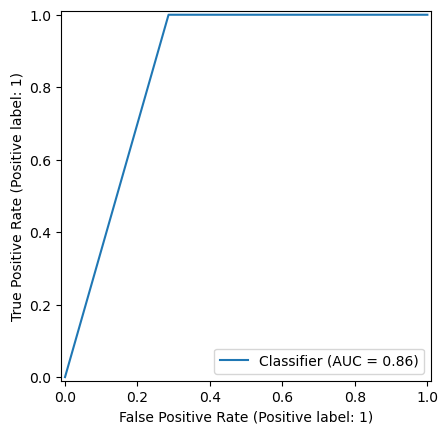

In [148]:
from sklearn.metrics import RocCurveDisplay
y_preds=lr_gs_model.predict(x_test)
RocCurveDisplay.from_predictions(y_test,y_preds)
plt.show()

### 3. Confusion matrix

In [149]:
confusion_matrix(y_test,y_preds)

array([[20,  8],
       [ 0, 33]])

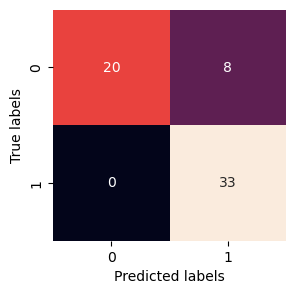

In [161]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test,y_preds),cbar=False,annot=True)
plt.xlabel("Predicted labels")
plt.ylabel("True labels");

### 4. Classification report

In [162]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        28
           1       0.80      1.00      0.89        33

    accuracy                           0.87        61
   macro avg       0.90      0.86      0.86        61
weighted avg       0.89      0.87      0.87        61



### 5. Cross validated accuracy, precision, recall and f1 score

In [163]:
lr_gs_model.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [166]:
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [167]:
cv_acc=cross_val_score(clf,x,y,cv=5,scoring='accuracy')
np.mean(cv_acc)

np.float64(0.8479781420765027)

In [168]:
cv_precision=cross_val_score(clf,x,y,cv=5,scoring='precision')
np.mean(cv_precision)

np.float64(0.8215873015873015)

In [169]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring='recall')
np.mean(cv_recall)

np.float64(0.9272727272727274)

In [170]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring='f1')
np.mean(cv_f1)

np.float64(0.8705403543192143)

<Axes: >

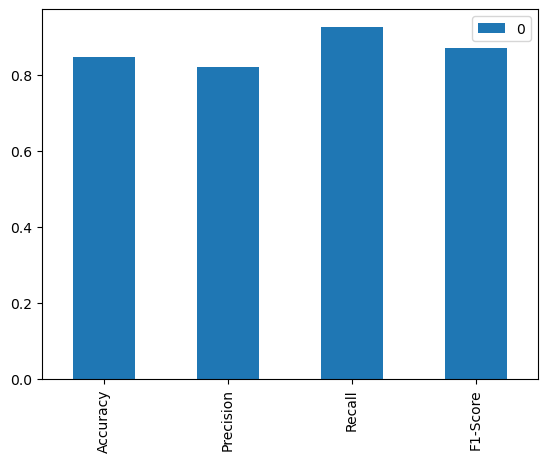

In [176]:
metrics_df=pd.DataFrame(data={"Accuracy":np.mean(cv_acc),
                              "Precision":np.mean(cv_precision),
                              "Recall":np.mean(cv_recall),
                              "F1-Score":np.mean(cv_f1)},index=[0]).T
metrics_df.plot(kind="bar")

## Which features are most important?

In [177]:
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [179]:
clf.coef_

array([[ 0.01373649, -0.87016987,  0.63911461, -0.01444304, -0.00147004,
        -0.0447204 ,  0.27484911,  0.02383634, -0.61352485, -0.52054754,
         0.43883023, -0.65058643, -0.62700553]])

<Axes: >

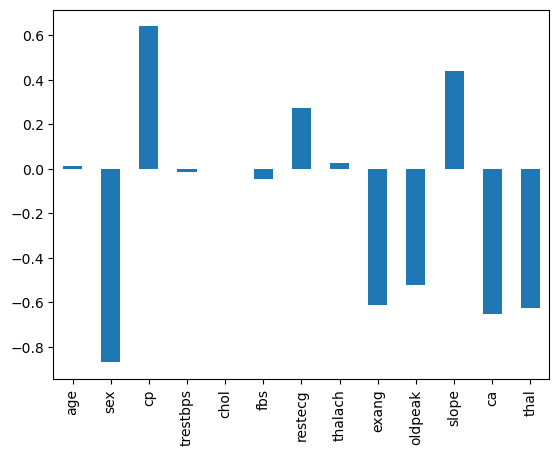

In [187]:
imp_df=pd.DataFrame(data=dict(zip(x.columns,list(clf.coef_[0]))),index=[0])
imp_df.T.plot.bar(legend=False)

## Experimentation

* Improve the data
* Change the model
* try new hyperparameters

In [235]:
x1=x.drop(['chol','trestbps','age'],axis=1)
x_train1,x_test1,y_train,y_test=train_test_split(x1,y,test_size=0.2)

In [236]:
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')
clf.fit(x_train1,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [237]:
clf.score(x_test1,y_test)

0.8852459016393442

In [238]:
lr_grid={"C":np.logspace(-4,4,20),
         "solver":["liblinear"]}

lr_gs_model=GridSearchCV(LogisticRegression(max_iter=1000),
                         param_grid=lr_grid,
                         cv=5,
                         verbose=True)
lr_gs_model.fit(x_train1,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [239]:
lr_gs_model.score(x_test1,y_test)

0.9016393442622951

In [240]:
import pickle
file=open('heart_disease_linear_improved.pkl','wb')
pickle.dump(lr_gs_model,file)
file.close()

In [242]:
file=open('heart_disease_linear_improved.pkl','rb')
model_clf=pickle.load(file)
model_clf.score(x_test1,y_test)

0.9016393442622951